In [1]:
%matplotlib inline

Isolation Forest
An example using IsolationForest for anomaly detection.
The IsolationForest 'isolates' observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeable shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [4]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as pltp
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

Automatically created module for IPython interactive environment


In [5]:
# Train Data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Some regular Novel Observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Some Abnormal Novel Observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

In [6]:
# Fitting the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

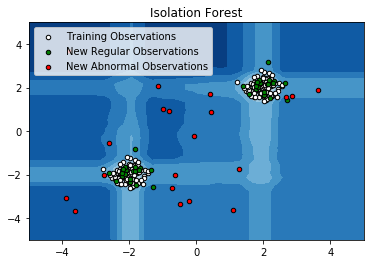

In [8]:
# Plot
# the line, the samples and the Nearest Vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Isolation Forest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=20, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green', s=20, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red', s=20, edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c], ["Training Observations",
                        "New Regular Observations", "New Abnormal Observations"],
                loc="upper left")
plt.show()